# Exploration liste des polluants

In [2]:
!pip install seaborn

In [1]:
# Import des librairies nécessaires pour l'analyse des données.

import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ibis
from pipelines.tasks._common import DUCKDB_FILE

ModuleNotFoundError: No module named 'seaborn'

In [45]:
ibis_con = ibis.connect(DUCKDB_FILE, read_only=True)

In [47]:
ibis_con.list_tables()

['edc_communes', 'edc_prelevements', 'edc_resultats']

In [48]:
# Faisons une requête SQL en utilisant duckdb via la librarie python pour lister les substances qui ont été recherchées
# et les trier par ordre décroissant de leur nombre d'occurrences

communes_table = ibis_con.table("edc_communes")
prelevements_table = ibis_con.table("edc_prelevements")
resultats_table = ibis_con.table("edc_resultats")

display(communes_table)
display(prelevements_table)
display(resultats_table)

DatabaseTable: edc_communes
  inseecommune      string
  nomcommune        string
  quartier          string
  cdreseau          string
  nomreseau         string
  debutalim         date
  de_partition      int32
  de_ingestion_date date

DatabaseTable: edc_prelevements
  cddept                     string
  cdreseau                   string
  inseecommuneprinc          string
  nomcommuneprinc            string
  cdreseauamont              string
  nomreseauamont             string
  pourcentdebit              string
  referenceprel              string
  dateprel                   date
  heureprel                  string
  conclusionprel             string
  ugelib                     string
  distrlib                   string
  moalib                     string
  plvconformitebacterio      string
  plvconformitechimique      string
  plvconformitereferencebact string
  plvconformitereferencechim string
  de_partition               int32
  de_ingestion_date          date

DatabaseTable: edc_resultats
  cddept                   string
  referenceprel            string
  cdparametresiseeaux      string
  cdparametre              int64
  libmajparametre          string
  libminparametre          string
  libwebparametre          string
  qualitparam              string
  insituana                string
  rqana                    string
  cdunitereferencesiseeaux string
  cdunitereference         string
  limitequal               string
  refqual                  string
  valtraduite              float64
  casparam                 string
  referenceanl             string
  de_partition             int32
  de_ingestion_date        date

In [61]:
communes_table = ibis_con.table("edc_communes").execute()
prelevements_table = ibis_con.table("edc_prelevements").execute()
resultats_table = ibis_con.table("edc_resultats").execute()

display(communes_table)
display(prelevements_table)
display(resultats_table)

,inseecommune,nomcommune,quartier,cdreseau,nomreseau,debutalim,de_partition,de_ingestion_date
0,01001,ABERGEMENT-CLEMENCIAT (L'),-,001000556,BDS ST DIDIER/CHALARONNE,2010-09-07,2024,2025-02-07
1,01002,ABERGEMENT-DE-VAREY (L'),-,001000369,L'ABERGEMENT-DE-VAREY,2010-09-07,2024,2025-02-07
2,01004,AMBERIEU-EN-BUGEY,Vareilles,001000248,AMBERIEU VAREILLES,2010-09-07,2024,2025-02-07
3,01004,AMBERIEU-EN-BUGEY,St Germain_Brédevent,001000249,AMBERIEU SAINT GERMAIN DOUVRES,2010-09-07,2024,2025-02-07
4,01004,AMBERIEU-EN-BUGEY,ville,001000251,AMBERIEU VILLE,2010-09-07,2024,2025-02-07
...,...,...,...,...,...,...,...,...
49531,97617,TSINGONI,MIRERENI VILLAGE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-07
49532,97617,TSINGONI,MROUALE VILLAGE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-07
49533,97617,TSINGONI,TSINGONI CENTRE,976000059,MIRERENI COMBANI,2013-05-30,2024,2025-02-07
49534,97701,SAINT-BARTHELEMY,Toute la commune,971000159,SAINT-BARTHELEMY,2010-10-19,2024,2025-02-07


,cddept,cdreseau,inseecommuneprinc,nomcommuneprinc,cdreseauamont,nomreseauamont,pourcentdebit,referenceprel,dateprel,heureprel,conclusionprel,ugelib,distrlib,moalib,plvconformitebacterio,plvconformitechimique,plvconformitereferencebact,plvconformitereferencechim,de_partition,de_ingestion_date
0,001,001000003,01007,AMBRONAY,None,None,None,00100139034,2024-01-23,11h27,Eau d'alimentation conforme aux limites de qua...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,N,C,2024,2025-02-07
1,001,001000003,01007,AMBRONAY,None,None,None,00100139393,2024-02-13,12h49,Eau d'alimentation conforme aux exigences de q...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,C,C,2024,2025-02-07
2,001,001000003,01007,AMBRONAY,001001304,TTP (CLG) AMBRONAY,100 %,00100139969,2024-03-13,10h46,Eau d'alimentation conforme aux exigences de q...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,C,C,2024,2025-02-07
3,001,001000003,01007,AMBRONAY,None,None,None,00100140209,2024-04-05,07h27,Eau d'alimentation conforme aux exigences de q...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,C,C,2024,2025-02-07
4,001,001000003,01007,AMBRONAY,None,None,None,00100140543,2024-05-13,12h43,Eau d'alimentation conforme aux exigences de q...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,C,C,2024,2025-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416123,976,976003554,97615,PAMANDZI,976000056,UP PAMANDZI,100 %,97600031949,2024-07-22,10h22,Eau d'alimentation conforme aux exigences de q...,MAYOTTE,SMAE,LES EAUX DE MAYOTTE,C,C,C,C,2024,2025-02-07
416124,976,976003554,97615,PAMANDZI,None,None,None,97600031996,2024-07-30,09h52,Eau d'alimentation conforme aux exigences de q...,MAYOTTE,SMAE,LES EAUX DE MAYOTTE,C,C,C,C,2024,2025-02-07
416125,976,976003554,97615,PAMANDZI,None,None,None,97600031997,2024-08-06,09h10,Eau d'alimentation conforme aux exigences de q...,MAYOTTE,SMAE,LES EAUX DE MAYOTTE,C,C,C,C,2024,2025-02-07
416126,976,976003554,97615,PAMANDZI,976000056,UP PAMANDZI,100 %,97600032142,2024-09-10,09h20,Eau d'alimentation non conforme aux limites de...,MAYOTTE,SMAE,LES EAUX DE MAYOTTE,N,C,C,C,2024,2025-02-07


,cddept,referenceprel,cdparametresiseeaux,cdparametre,libmajparametre,libminparametre,libwebparametre,qualitparam,insituana,rqana,cdunitereferencesiseeaux,cdunitereference,limitequal,refqual,valtraduite,casparam,referenceanl,de_partition,de_ingestion_date
0,001,00100138503,ALTMICR,1370.0,ALUMINIUM TOTAL µG/L,Aluminium total µg/l,None,N,L,<10,µg/L,133,None,<=200 µg/L,0.00,7429-90-5,00100147233,2024,2025-02-07
1,001,00100138503,ASP,6489.0,ASPECT (QUALITATIF),Aspect (qualitatif),None,O,L,Aspect normal,SANS OBJET,X,None,None,0.00,None,00100147232,2024,2025-02-07
2,001,00100138503,ASP,6489.0,ASPECT (QUALITATIF),Aspect (qualitatif),None,O,L,Aspect normal,SANS OBJET,X,None,None,0.00,None,00100147233,2024,2025-02-07
3,001,00100138503,CL2LIB,1398.0,CHLORE LIBRE,Chlore libre,None,N,T,"0,30",mg(Cl2)/L,165,None,None,0.30,None,None,2024,2025-02-07
4,001,00100138503,CL2TOT,1399.0,CHLORE TOTAL,Chlore total,None,N,T,"0,34",mg(Cl2)/L,165,None,None,0.34,None,None,2024,2025-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12386446,976,97600032418,PH,1302.0,PH,pH,None,N,T,"7,4",unité pH,264,None,">=6,5 et <=9 unité pH",7.40,None,None,2024,2025-02-07
12386447,976,97600032418,SAVQ,5902.0,SAVEUR (QUALITATIF),Saveur (qualitatif),None,O,T,Aucun changement anormal,SANS OBJET,X,None,None,0.00,None,None,2024,2025-02-07
12386448,976,97600032418,STRF,6455.0,ENTÉROCOQUES /100ML-MS,Entérocoques /100ml-MS,None,N,L,<1,n/(100mL),226,<=0 n/(100mL),None,0.00,None,97600042685,2024,2025-02-07
12386449,976,97600032418,TEMPDOM,1301.0,TEMPÉRATURE DE L'EAU (DOM),Température de l'eau (DOM),None,N,T,"30,5",°C,27,None,None,30.50,None,None,2024,2025-02-07


In [53]:
print(result.columns)

Index(['cddept', 'referenceprel', 'cdparametresiseeaux', 'cdparametre',
       'libmajparametre', 'libminparametre', 'libwebparametre', 'qualitparam',
       'insituana', 'rqana', 'cdunitereferencesiseeaux', 'cdunitereference',
       'limitequal', 'refqual', 'valtraduite', 'casparam', 'referenceanl',
       'de_partition', 'de_ingestion_date'],
      dtype='object')


In [54]:
# Nettoyage des données
colonnes_vides = result.columns[result.isnull().mean() > 0.8]
data_cleaned = result.drop(columns=colonnes_vides)
print(f"Colonne(s) supprimée(s) : {colonnes_vides.tolist()}")

Colonne(s) supprimée(s) : ['libwebparametre']


In [55]:
# Analyse descriptive
print(data_cleaned["libmajparametre"].describe())

count     12386451
unique        1337
top            PH 
freq        349625
Name: libmajparametre, dtype: object


/var/folders/k7/bwwlkzbs4d1bbxw9drfptg2m0000gn/T/ipykernel_12065/2468681632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


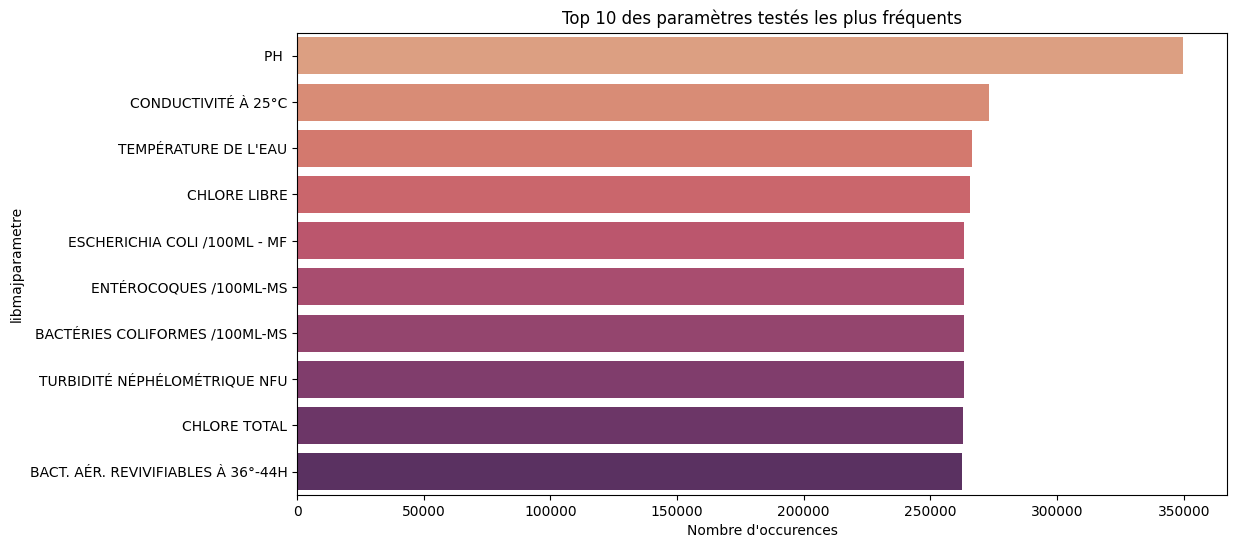

In [10]:
# Top 10 des paramètres testés les plus fréquents

frequence_test = data_cleaned["libmajparametre"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=frequence_test.values[:10], y=frequence_test.index[:10], palette="flare")
plt.title("Top 10 des paramètres testés les plus fréquents")
plt.xlabel("Nombre d'occurences")
plt.show()

In [56]:
# Analyse par année
# TODO : vérifier que la bdd contient d'autres années que 2024
stats_annee = data_cleaned.groupby("de_partition")["libmajparametre"].describe()
print(stats_annee)

                 count unique  top    freq
de_partition                              
2024          12386451   1337  PH   349625


In [32]:
# Filtrage des substances par recherche texte
categories_polluants = {
    "pesticides": ["azine", "phos", "triazine", "glyphosate", "atrazine", "metolachlor"],
    "nitrates et nitrites": ["nitrate", "nitrite"],
    "PFAS": ["fluoro", "perfluoro", "PFOA", "PFOS"],
    "phtalates": ["phtalate", "DEHP", "BBP", "DBP"],
    "chlorure de vinyle": ["chlorure de vinyle"],
    "hydrocarbures": ["benzène", "toluène", "naphtalène", "xylène"],
    "métaux lourds": ["mercure", "plomb", "arsenic", "cadmium", "nickel", "chrome"],
}

# Recherche dans le df
for categorie, mot_cle in categories_polluants.items():
    filtre = data_cleaned["libmajparametre"].str.contains(
        "|".join(mot_cle), case=False, na=False
    )
    polluants = data_cleaned[filtre]

    print(f"\n {categorie} ({len(polluants)} polluants chimiques trouvés)")
    print(polluants[["libmajparametre"]].head())



 pesticides (559999 polluants chimiques trouvés)
                    libmajparametre
4952             ATRAZINE-2-HYDROXY
4960              ATRAZINE DÉSÉTHYL
4961    ATRAZINE DÉSÉTHYL-2-HYDROXY
4962  ATRAZINE DÉSÉTHYL DÉISOPROPYL
4963           ATRAZINE-DÉISOPROPYL

 nitrates et nitrites (259979 polluants chimiques trouvés)
        libmajparametre
66    NITRITES (EN NO2)
2696  NITRITES (EN NO2)
2743  NITRITES (EN NO2)
2790  NITRITES (EN NO2)
2837  NITRITES (EN NO2)

 PFAS (29015 polluants chimiques trouvés)
                           libmajparametre
35185            ACIDE PERFLUOROBUTANOÏQUE
35186            PERFLUOROBUTANE SULFONATE
35187           ACIDE PERFLUORO-DECANOÏQUE
35188          ACIDE PERFLUORODODÉCANOIQUE
35189  ACIDE PERFLUORODODÉCANE SULFONIQUE 

 phtalates (105 polluants chimiques trouvés)
                     libmajparametre
707074  DEHP (2-ETHYLHEXYL PHTALATE)
733351  DEHP (2-ETHYLHEXYL PHTALATE)
765607  DEHP (2-ETHYLHEXYL PHTALATE)
823025  DEHP (2-ETHYLHEXYL PHTALATE

In [12]:
# Classification des polluants


def classifier_polluant(row):
    for categorie, mot_cle in categories_polluants.items():
        if any(kw in str(row).lower() for kw in mot_cle):
            return categorie
    return "Autres"


data_cleaned["categorie"] = data_cleaned["libmajparametre"].apply(classifier_polluant)

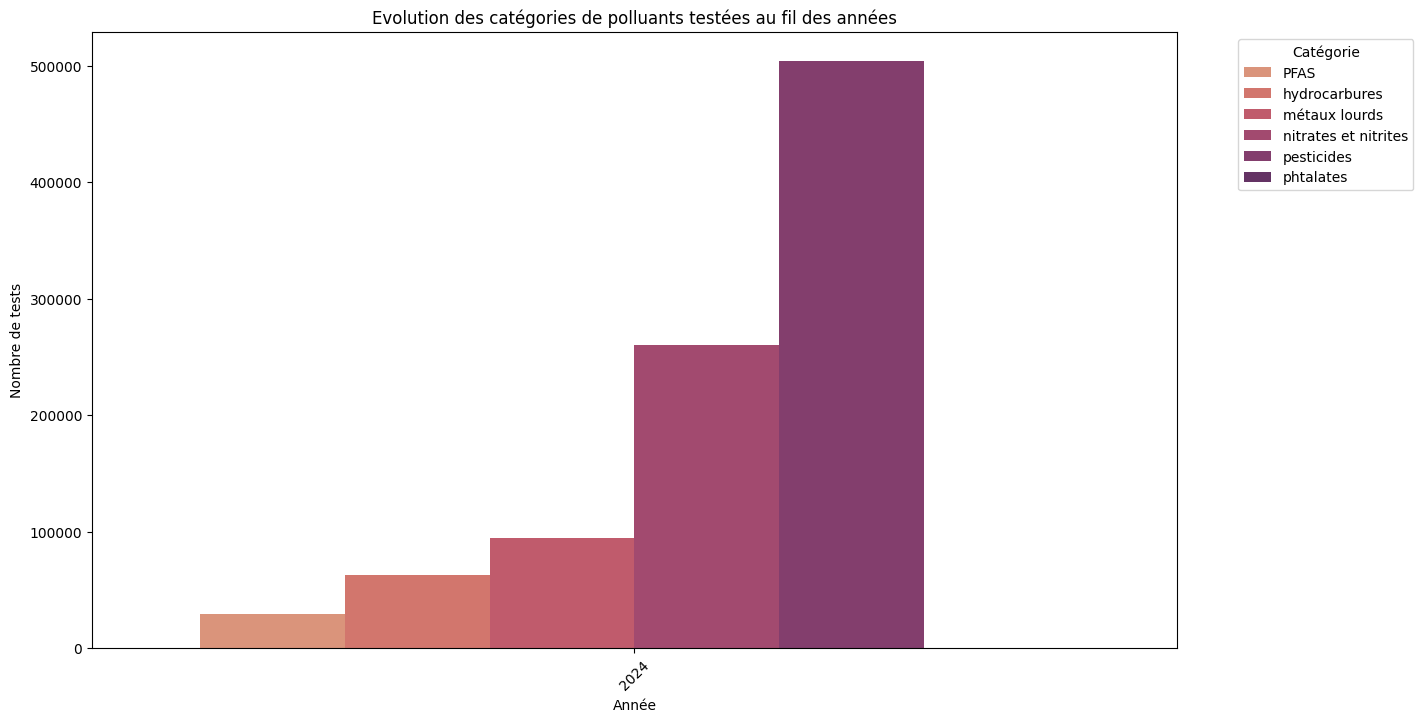

In [ ]:
# Visualisation des polluants testés en fonction de l'année
df = data_cleaned[data_cleaned["categorie"] != "Autres"]

count_tests = (
    df.groupby(["de_partition", "categorie"]).size().reset_index(name="nb_tests")
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=count_tests, x="de_partition", y="nb_tests", hue="categorie", palette="flare"
)
plt.title("Evolution des catégories de polluants testées au fil des années")
plt.xlabel("Année")
plt.ylabel("Nombre de tests")
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

/var/folders/k7/bwwlkzbs4d1bbxw9drfptg2m0000gn/T/ipykernel_12065/4278434037.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


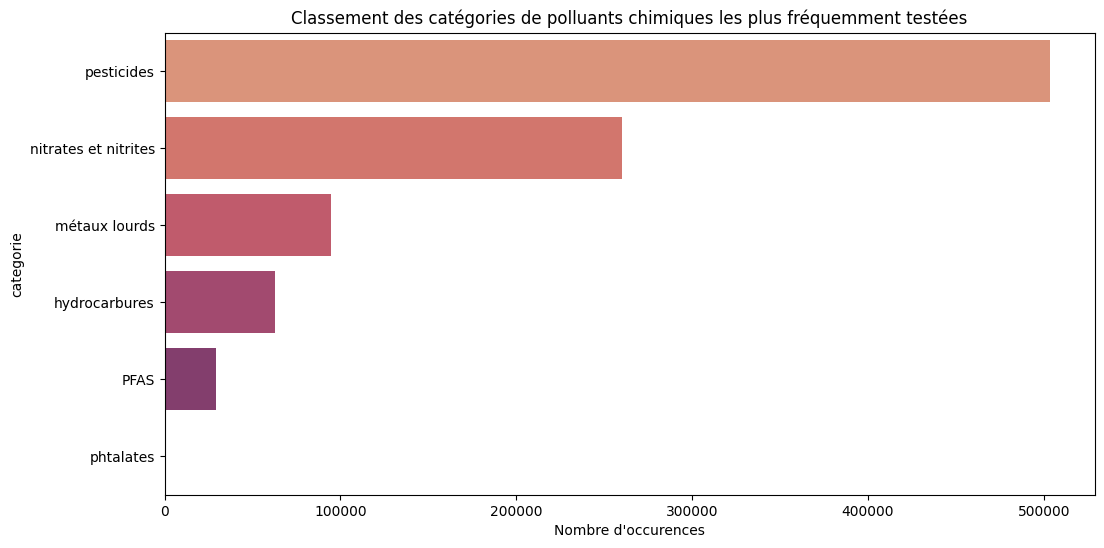

In [ ]:
# Top 10 des catégories de polluants chimiques les plus fréquemment testées

frequence_test = df["categorie"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=frequence_test.values, y=frequence_test.index, palette="flare")
plt.title(
    "Classement des catégories de polluants chimiques les plus fréquemment testées"
)
plt.xlabel("Nombre d'occurences")
plt.show()

In [14]:
# Jointure pour récupérer la commune
df_prel = con.table("edc_prelevements").df()
data_merged = pd.merge(
    data_cleaned[
        ["cddept", "referenceprel", "categorie", "limitequal", "refqual", "valtraduite"]
    ],
    df_prel[["cddept", "referenceprel", "inseecommuneprinc", "nomcommuneprinc"]],
    on=["cddept", "referenceprel"],
    how="left",
)
bdd = data_merged[data_merged["categorie"] != "Autres"]
bdd.head()

,cddept,referenceprel,categorie,limitequal,refqual,valtraduite,inseecommuneprinc,nomcommuneprinc
41,001,00100138843,métaux lourds,<=5 µg/L,None,0.000,01450,VILLIEU-LOYES-MOLLON
50,001,00100138843,métaux lourds,<=50 µg/L,None,0.000,01450,VILLIEU-LOYES-MOLLON
63,001,00100138843,hydrocarbures,None,None,0.008,01450,VILLIEU-LOYES-MOLLON
65,001,00100138843,métaux lourds,<=20 µg/L,None,0.000,01450,VILLIEU-LOYES-MOLLON
66,001,00100138843,nitrates et nitrites,"<=0,5 mg/L",None,0.000,01450,VILLIEU-LOYES-MOLLON


In [ ]:
# Communes les plus testées par catégorie


In [ ]:
# Cartographie des catégories de polluants